In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import sklearn as sk
import pylab as pl


In [2]:
names = pd.DataFrame()
names_hex = pd.DataFrame()
names_tet = pd.DataFrame()

In [3]:

path = r'../../data/class/hexaploids/'
df1 = pd.DataFrame()


i=0
for root, dirs, files in os.walk(path):
   # print(root)
    for _file in files:
        if _file == 'commonResults.csv':
            i = i+1
            #print(root +'/' + _file)
            path1 = root +'/' + _file
            df2 = pd.read_csv(filepath_or_buffer=path1, sep=';')
            df1 = pd.concat([df1, df2], ignore_index=True)
            
#print(df1.head())
print(df1.shape)
#print(i)
del df1['Unnamed: 12']

print(df1.shape)

df1['hex'] = 1
df1['tet'] = 0


er = df1['File name'].str.find('(')
for i in range(2344):
    if er[i] == 4:
        print(df1['File name'][i], i)
#er.unique()

(2344, 13)
(2344, 12)
6668(2).jpg 165
6890(2).jpg 302
6667(2).jpg 340
6670(2).jpg 349
7058(2).jpg 592
7057(2).jpg 742
7056(3).jpg 849
7055(2).jpg 1186
7056(2).jpg 1211
6664(2).jpg 1421
7060(2).jpg 1522
6917(2).jpg 1620
6663(2).jpg 1652
6742(2).jpg 1683
7053(2).jpg 1729
7059(2).jpg 1738
6666(2).jpg 1757
6665(2).jpg 1899
7051(2).jpg 1982
6661(2).jpg 2020
6662(2).jpg 2156
6669(2).jpg 2342


In [4]:
names_hex = df1['File name']

In [5]:
path = r'../../data/class/tetraploids/'
df2 = pd.DataFrame()

i=0
for root, dirs, files in os.walk(path):
   # print(root)
    for _file in files:
        if _file == 'commonResults.csv':
            i = i+1
            #print(root +'/' + _file)
            path1 = root +'/' + _file
            df3 = pd.read_csv(filepath_or_buffer=path1, sep=';')
            df2 = pd.concat([df2, df3], ignore_index=True)
            
df2.head()
del df2['Unnamed: 12']
print(df2.shape)
#print(i)
df2['hex'] = 0
df2['tet'] = 1



(1259, 12)


In [6]:
names_tet = df2['File name']

In [137]:
'8868_{II-16}.jpg' in names_tet.unique()

True

In [138]:
'6614_1_{II-19}.jpg' in names_tet.unique()

True

In [7]:
All_commonResults = pd.concat([df1, df2], ignore_index=True)

#All_commonResults.to_csv('mergedtable_commonResults.csv')
#All_commonResults.to_csv('../mergedtable_commonResults.csv')

# er = All_commonResults['File name'].str.find('(2)')
# er.unique()
#All_commonResults[All_commonResults.str.contains('(2)')]


In [8]:
names = All_commonResults['File name']
names

0               6506_2.jpg
1       6557_2_{II-19}.jpg
2       6545_4_{II-19}.jpg
3         6762_{IX-18}.jpg
4       6937_1_{IX-16}.jpg
               ...        
3598    8697_3_{II-16}.jpg
3599      8712_{II-16}.jpg
3600    7617_4_{II-17}.jpg
3601    6701_3_{II-19}.jpg
3602      8469_{IX-17}.jpg
Name: File name, Length: 3603, dtype: object

In [9]:
print(All_commonResults.shape)
new_commonResults = All_commonResults['File name'].str.split('{',expand=True)

new_commonResults.columns=['two columns','vegetation']

for column in new_commonResults.columns:
    new_commonResults[column] = new_commonResults[column].str.replace('}.jpg','')
    new_commonResults[column] = new_commonResults[column].str.replace('.jpg','')
    new_commonResults[column] = new_commonResults[column].str.replace('}','')
    new_commonResults[column] = new_commonResults[column].str.replace(' ','')
    new_commonResults[column] = new_commonResults[column].str.replace('-','')

n_veg = new_commonResults['vegetation']
print(n_veg.unique())

new_cr = new_commonResults['two columns'].str.split('_',expand=True)
# print(new_cr)
# print(new_cr[1].unique())

new_cr.columns=['passive number','protocol', 'empty']
del new_cr['empty']

print(new_cr['protocol'].unique())
print(new_cr.shape)

new_name = pd.concat([new_cr, n_veg], axis=1)

del All_commonResults['File name']
All_commonResults_n = pd.concat([new_name, All_commonResults], axis=1)


(3603, 14)
[None 'II19' 'IX18' 'IX16' 'II18' 'X14' 'IX17' 'II17' 'X18' 'II16' 'II15']
['2' '4' '' '1' '3' None '5' '3(2)' '1(2)' '2(2)' '4(2)']
(3603, 2)


In [10]:
#print(All_commonResults_n['protocol'].value_count())
np.sum(All_commonResults_n['protocol'] == None)


0

In [11]:
print(All_commonResults_n['hex'][0:6])

0    1
1    1
2    1
3    1
4    1
5    1
Name: hex, dtype: int64


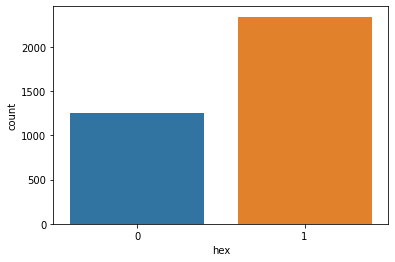

In [13]:
sns.countplot(All_commonResults_n['hex'])

In [ ]:
sns.countplot(All_commonResults_n['protocol'])

In [ ]:
sns.heatmap(All_commonResults_n.corr())

In [11]:
path = r'../../data/class/hexaploids/'
df1 = pd.DataFrame()

i=0
for root, dirs, files in os.walk(path):
   # print(root)
    for _file in files:
        if _file == 'quadrangleResults.csv':
            i = i+1
            #print(root +'/' + _file)
            path1 = root +'/' + _file
            
            df2 = pd.read_csv(filepath_or_buffer=path1, sep=';')
            df1 = pd.concat([df1, df2], ignore_index=True)
            
# df1.head()
# print(df1.shape)

del df1['Unnamed: 38']
print(df1.shape)

#df1.head()

(2344, 38)


In [12]:
path = r'../../data/class/tetraploids/'
df2 = pd.DataFrame()

i=0
for root, dirs, files in os.walk(path):
   # print(root)
    for _file in files:
        if _file == 'quadrangleResults.csv':
            i = i+1
            #print(root +'/' + _file)
            path1 = root +'/' + _file
            df3 = pd.read_csv(filepath_or_buffer=path1, sep=';')
            df2 = pd.concat([df2, df3], ignore_index=True)
            
# df2.head()
# print(df2.shape)

del df2['Unnamed: 38']
#df2.head()


In [13]:
quadrangleResults = pd.concat([df1, df2], ignore_index=True)
print(quadrangleResults.shape)
#quadrangleResults.to_csv('../mergedtable_quadrangleResults.csv')

(3603, 38)


In [14]:
print(quadrangleResults.shape)
new_quadrangleResults = quadrangleResults['File name'].str.split('{',expand=True)

new_quadrangleResults.columns=['two columns','vegetation']

for column in new_quadrangleResults.columns:
    new_quadrangleResults[column] = new_quadrangleResults[column].str.replace('}.jpg','')
    new_quadrangleResults[column] = new_quadrangleResults[column].str.replace('.jpg','')
    new_quadrangleResults[column] = new_quadrangleResults[column].str.replace('}','')
    new_quadrangleResults[column] = new_quadrangleResults[column].str.replace(' ','')
    new_quadrangleResults[column] = new_quadrangleResults[column].str.replace('-','')

n_veg1 = new_quadrangleResults['vegetation']

new_qr = new_quadrangleResults['two columns'].str.split('_',expand=True)
print(new_qr.shape)

new_qr.columns=['passive number','protocol', 'empty']
del new_qr['empty']
print(new_qr.shape)

new_name1 = pd.concat([new_qr, n_veg1], axis=1)
del quadrangleResults['File name']
quadrangleResults_n = pd.concat([new_name1, quadrangleResults], axis=1)

(3603, 38)
(3603, 3)
(3603, 2)


In [15]:
path = r'../../data/class/hexaploids/'
df1 = pd.DataFrame()

i=0
for root, dirs, files in os.walk(path):
   # print(root)
    for _file in files:
        if _file == 'profileResults.csv':
            i = i+1
            #print(root +'/' + _file)
            path1 = root +'/' + _file
            if (path1 == '../../data/class/hexaploids/6733_{IX-18}/profileResults.csv'):
                continue
#             print(path1)
            df2 = pd.read_csv(filepath_or_buffer=path1, sep=';',skiprows=1, header = None)
            df2.columns = df2.columns.astype(str)
            #df1.columns = df2.columns.astype(str)
            df1 = pd.concat([df1, df2], ignore_index=True)
            
# df1.head()


del df1['22']
print(df1.shape)


(2344, 42)


In [16]:
path = r'../../data/class/tetraploids/'
df2 = pd.DataFrame()

i=0
for root, dirs, files in os.walk(path):
   # print(root)
    for _file in files:
        if _file == 'profileResults.csv':
            i = i+1
            #print(root +'/' + _file)
            path1 = root +'/' + _file
            if (path1 == '../../data/class/tetraploids/7677_{IX-18}/profileResults.csv'):
                continue
#             print(path1)
            df3 = pd.read_csv(filepath_or_buffer=path1, sep=';',skiprows=1, header = None)
            df3.columns = df3.columns.astype(str)
            df2 = pd.concat([df2, df3], ignore_index=True)
            
# df2.head()
# print(df2['22'])

del df2['22']
df2.head()


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,8716_2_{II-16}.jpg,8716,0.980772,1.249873,2.074989,3.421302,3.484167,3.469312,4.082360,3.657572,...,3.467965,2.824291,2.581572,2.363866,1.991487,1.488254,1.308086,0.975353,1.025375,0.984492
1,8467_2_{II-16}.jpg,8467,1.787062,1.831315,2.181258,2.484522,2.512060,2.374751,2.507860,2.715210,...,2.965889,3.167169,2.753725,3.454373,3.099026,1.950005,1.924267,2.383322,1.813134,2.389404
2,7912_3_{X-14}.jpg,7912,0.337571,1.211098,0.533822,1.795719,2.717859,3.734066,4.585203,5.110223,...,5.739649,5.647251,6.523615,7.028651,4.736716,5.127085,6.498436,5.473281,6.841411,5.361107
3,6920_2_{IX-18}.jpg,6920,0.695765,1.559123,2.009557,2.548709,2.763165,2.589656,2.641505,2.602542,...,2.443936,2.532202,2.452867,2.286481,1.880566,2.469632,1.583217,1.175082,1.040800,1.342917
4,7845_3_{X-14}.jpg,7845,1.152014,0.362682,1.994069,2.436121,2.710412,3.148856,3.189842,3.157409,...,2.986646,2.909973,2.833612,2.726302,2.678554,2.033111,1.871846,1.860561,0.412479,0.131452


In [17]:
profileResults = pd.concat([df1, df2], ignore_index=True)
print(profileResults.head())

#quadrangleResults.to_csv('../mergedtable_quadrangleResults.csv')

                    0       1         2         3         4         5  \
0          6506_2.jpg  6506.0  2.591510  4.200262  4.752403  4.776805   
1  6557_2_{II-19}.jpg  6557.0  1.548787  1.278754  2.984839  2.616312   
2  6545_4_{II-19}.jpg  6545.0  1.392905  2.141671  2.021846  2.650226   
3    6762_{IX-18}.jpg  6762.0  1.996700  2.368464  3.010053  3.133792   
4  6937_1_{IX-16}.jpg  6937.0  0.983038  1.642720  4.067138  5.572523   

          6         7         8         9  ...        33        34        35  \
0  5.286640  5.447849  4.781391  5.304151  ...  4.898979  4.748545  4.477196   
1  3.691605  3.572701  4.583796  4.135480  ...  4.217341  4.373943  4.294691   
2  1.877760  2.849907  2.394036  2.493419  ...  3.210570  3.538358  3.214641   
3  3.668881  2.954036  3.006524  3.889451  ...  3.722241  3.636338  3.084399   
4  6.010708  6.202041  6.603725  6.757071  ...  6.879546  7.083002  7.435456   

         36        37        38        39        40        41        42  
0  4.6

In [18]:
from sklearn.decomposition import PCA

h = profileResults.columns[2:12]
name = profileResults['0']
num = profileResults['1']
pro_f = profileResults.drop(columns = ['0','1'])

pca = PCA(n_components = 10)

pro_f = pca.fit_transform(pro_f)
pro_f = pd.DataFrame(pro_f)

pro_f.columns = h

print(pro_f.columns)

profileResults = pd.concat([name, num, pro_f], axis=1)
profileResults

Index(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], dtype='object')


,0,1,2,3,4,5,6,7,8,9,10,11
0,6506_2.jpg,6506.0,3.293305,4.282769,-0.991447,-0.613561,0.467732,-0.258585,-0.281223,0.126174,0.607591,0.335788
1,6557_2_{II-19}.jpg,6557.0,-0.252893,-1.901316,0.529045,-0.481884,-0.039449,0.515447,-0.057711,0.053474,-0.228243,0.532159
2,6545_4_{II-19}.jpg,6545.0,-6.444442,-1.502195,0.630649,-0.642935,-0.217586,0.549038,0.096207,-0.003857,-0.286266,0.232238
3,6762_{IX-18}.jpg,6762.0,-5.304781,1.689916,-0.391877,-0.933988,-0.397664,0.337376,-0.501239,0.963001,0.477753,-0.999689
4,6937_1_{IX-16}.jpg,6937.0,12.518503,-0.502909,-4.266915,0.207319,-0.720155,-0.540989,-0.250200,-1.128457,2.023639,-3.592087
...,...,...,...,...,...,...,...,...,...,...,...,...
3598,8697_3_{II-16}.jpg,8697.0,2.932286,-2.332858,-2.405709,-1.294448,-1.510381,-0.242979,-0.465657,1.445664,1.463457,-0.951495
3599,8712_{II-16}.jpg,8712.0,6.564415,-5.648565,-0.873252,-1.240608,1.274217,-0.241369,1.177130,-0.342870,-1.613611,-1.373125
3600,7617_4_{II-17}.jpg,7617.0,-10.134949,-0.993459,-0.847472,-1.183038,-0.567039,0.272485,1.028272,-1.263975,-1.344372,0.033838
3601,6701_3_{II-19}.jpg,6701.0,12.477203,-0.529234,-4.723925,-0.381955,1.129291,-0.305614,-0.735553,2.065740,-0.118377,-0.778545


In [19]:

new_profileResults = profileResults['0'].str.split('{',expand=True)

new_profileResults.columns=['two columns','vegetation']

for column in new_profileResults.columns:
    new_profileResults[column] = new_profileResults[column].str.replace('}.jpg','')
    new_profileResults[column] = new_profileResults[column].str.replace('.jpg','')
    new_profileResults[column] = new_profileResults[column].str.replace('}','')
    new_profileResults[column] = new_profileResults[column].str.replace(' ','')
    new_profileResults[column] = new_profileResults[column].str.replace('-','')

n_veg1 = new_profileResults['vegetation']

new_qr = new_profileResults['two columns'].str.split('_',expand=True)
print(new_qr.shape)

new_qr.columns=['passive number','protocol', 'empty']
del new_qr['empty']
print(new_qr.shape)

new_name1 = pd.concat([new_qr, n_veg1], axis=1)
del profileResults['0']
profileResults_n = pd.concat([new_name1, profileResults], axis=1)


(3603, 3)
(3603, 2)


In [20]:
path = r'../../data/class/hexaploids/'
df1 = pd.DataFrame()

i=0
for root, dirs, files in os.walk(path):
   # print(root)
    for _file in files:
        if _file == 'radialResults.csv':
            i = i+1
#             print(root +'/' + _file)
            path1 = root +'/' + _file
            if (path1 == '../../data/class/hexaploids/6733_{IX-18}/radialResults.csv'):
                continue
#             print(path1)
            df2 = pd.read_csv(filepath_or_buffer=path1, sep=';',skiprows=1, header = None)
            df2.columns = df2.columns.astype(str)
            #df1.columns = df2.columns.astype(str)
            df1 = pd.concat([df1, df2], ignore_index=True)
            
# df1.head()


# del df1['22']
print(df1.shape)

# df1

(2344, 362)


In [21]:
path = r'../../data/class/tetraploids/'
df2 = pd.DataFrame()

i=0
for root, dirs, files in os.walk(path):
   # print(root)
    for _file in files:
        if _file == 'radialResults.csv':
            i = i+1
            #print(root +'/' + _file)
            path1 = root +'/' + _file
            if (path1 == '../../data/class/tetraploids/7677_{IX-18}/radialResults.csv'):
                continue
#             print(path1)
            df3 = pd.read_csv(filepath_or_buffer=path1, sep=';',skiprows=1, header = None)
            df3.columns = df3.columns.astype(str)
            df2 = pd.concat([df2, df3], ignore_index=True)
            
# df2.head()
# print(df2['22'])

# del df2['22']
# df2.head()


In [22]:
radialResults = pd.concat([df1, df2], ignore_index=True)
print(radialResults.shape)



#quadrangleResults.to_csv('../mergedtable_quadrangleResults.csv')

(3603, 362)


In [23]:

h = radialResults.columns[2:12]
name = radialResults['0']
num = radialResults['1']
pro_f = radialResults.drop(columns = ['0','1'])

pca = PCA(n_components = 10)

pro_f = pca.fit_transform(pro_f)
pro_f = pd.DataFrame(pro_f)

pro_f.columns = h

print(pro_f.columns)

radialResults = pd.concat([name, num, pro_f], axis=1)
radialResults

Index(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], dtype='object')


,0,1,2,3,4,5,6,7,8,9,10,11
0,6506_2.jpg,6506.0,-28.954481,30.805628,10.245582,-2.448493,3.879531,7.695086,3.923954,0.500329,-4.957670,-0.126102
1,6557_2_{II-19}.jpg,6557.0,32.145194,-5.648934,-5.150505,-2.484149,-9.972486,0.414921,0.287313,2.796915,-1.392288,-0.291015
2,6545_4_{II-19}.jpg,6545.0,-17.601176,-33.542786,0.654185,-5.261470,-0.322413,2.317910,-0.370653,1.224236,2.503997,2.938406
3,6762_{IX-18}.jpg,6762.0,19.188306,-38.668500,-24.354716,1.584661,8.238438,0.065902,4.890949,5.147868,1.705878,1.877855
4,6937_1_{IX-16}.jpg,6937.0,-8.299012,49.473220,-85.507969,4.557711,0.247446,-18.165657,8.137124,-7.415551,-5.769573,-0.003023
...,...,...,...,...,...,...,...,...,...,...,...,...
3598,8697_3_{II-16}.jpg,8697.0,-10.563125,25.664943,-38.473783,9.709441,3.415839,11.031188,6.620629,-5.201329,0.406658,-4.356175
3599,8712_{II-16}.jpg,8712.0,-56.153862,43.608652,-16.672403,-32.409588,9.569554,-2.547144,-11.748189,3.903808,-3.968474,2.714689
3600,7617_4_{II-17}.jpg,7617.0,-57.169568,-35.657930,14.963074,-3.586496,-7.361621,-6.804589,1.421236,7.572347,7.408160,-2.106999
3601,6701_3_{II-19}.jpg,6701.0,43.355173,69.210585,-14.283714,4.785192,-1.778672,-5.282069,6.102863,-3.719406,2.207570,-5.465354


In [24]:
names = radialResults['0']
names

0               6506_2.jpg
1       6557_2_{II-19}.jpg
2       6545_4_{II-19}.jpg
3         6762_{IX-18}.jpg
4       6937_1_{IX-16}.jpg
               ...        
3598    8697_3_{II-16}.jpg
3599      8712_{II-16}.jpg
3600    7617_4_{II-17}.jpg
3601    6701_3_{II-19}.jpg
3602      8469_{IX-17}.jpg
Name: 0, Length: 3603, dtype: object

In [25]:

new_radialResults = radialResults['0'].str.split('{',expand=True)

new_radialResults.columns=['two columns','vegetation']

for column in new_radialResults.columns:
    new_radialResults[column] = new_radialResults[column].str.replace('}.jpg','')
    new_radialResults[column] = new_radialResults[column].str.replace('.jpg','')
    new_radialResults[column] = new_radialResults[column].str.replace('}','')
    new_radialResults[column] = new_radialResults[column].str.replace(' ','')
    new_radialResults[column] = new_radialResults[column].str.replace('-','')

n_veg1 = new_radialResults['vegetation']

new_qr = new_radialResults['two columns'].str.split('_',expand=True)
print(new_qr.shape)

new_qr.columns=['passive number','protocol', 'empty']
del new_qr['empty']
print(new_qr.shape)

new_name1 = pd.concat([new_qr, n_veg1], axis=1)
del radialResults['0']
radialResults_n = pd.concat([new_name1, radialResults], axis=1)


(3603, 3)
(3603, 2)


In [26]:
# print(quadrangleResults_n)
#np.sum(quadrangleResults_n == 1)

In [140]:
combined = pd.merge(All_commonResults_n, quadrangleResults_n, on=['passive number', 'protocol', 'vegetation'])
combined = pd.merge(combined, profileResults_n, on=['passive number', 'protocol', 'vegetation'])
combined = pd.merge(combined, radialResults_n, on=['passive number', 'protocol', 'vegetation'])

# print(combined)
result = combined


In [141]:
# result.to_csv('../mergedtable_combined.csv')

In [142]:
result['protocol'].unique()

array(['2', '4', '', '1', '3', None, '5', '3(2)', '1(2)', '2(2)', '4(2)'],
      dtype=object)

In [143]:
print(names_tet.shape)
print(names_hex.shape)

(1259,)
(2344,)


In [144]:
a = result['vegetation']
b = result['protocol']
for i in range(len(a)):
    if a[i] is None:
        a[i] = '0'
    if b[i] == '':
        b[i] = '0'
    if b[i] is None:
        b[i] = '0'
result['vegetation'] = a  
result['protocol'] = b 

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [145]:
name1 = None
name2 = None
name3 = None

In [146]:
#test1 = pd.DataFrame( index = [0:781])
df1 = result
# df1['num_pr'] = df1['passive number'].str.cat(df1['vegetation'], sep =" ")
# df1 = df1.drop_duplicates(subset='num_pr', keep="last")
#df1 = df1.dropna()
df1 = pd.concat([names, df1], axis=1)
num_pr = df1['passive number'].str.cat(df1['vegetation'], sep =" ")
test1 = df1[:][1563:1952]
test2 = df1[:][3182:3392]
test = pd.concat([test1,test2],axis=0, ignore_index=True)


names_test1 = names[:][1563:1952] #hex
names_test2 = names[:][3182:3392] #tet
names_test = pd.concat([names_test1,names_test2],axis=0, ignore_index=True)
names_test.to_csv('../../task1/names_test.csv')

train1 = df1[:][0:1562]
train2 = df1[:][2344:3182]
train = pd.concat([train1,train2],axis=0, ignore_index=True)

names_train1 = names[:][0:1562]  #hex
names_train2 = names[:][2344:3182] #tet
names_train = pd.concat([names_train1,names_train2],axis=0, ignore_index=True)
names_train.to_csv('../../task1/names_train.csv')
print(train.shape)

#test = pd.DataFrame( test, index =range(len(test)))
d_sel1 = df1[:][1953:2343]
d_sel2 = df1[:][3392:3603]
d_sel = pd.concat([d_sel1,d_sel2],axis=0, ignore_index=True)

names_out1 = names[:][1953:2343] #hex
names_out2 = names[:][3392:3603] #tet
names_holdout = pd.concat([names_out1,names_out2],axis=0, ignore_index=True)
names_holdout.to_csv('../../task1/names_holdout.csv')

test['num_pr'] = test['passive number'].str.cat(test['vegetation'], sep =" ")
name1 = pd.concat([names_test, test['num_pr']], axis=1)
# test = test.drop_duplicates(subset='num_pr', keep="last")
# name1=name1.drop_duplicates(subset='num_pr', keep="last")


train['num_pr'] = train['passive number'].str.cat(train['vegetation'], sep =" ")
name2 = pd.concat([names_train, train['num_pr']], axis=1)
# train = train.drop_duplicates(subset='num_pr', keep="last")
# name2 = name2.drop_duplicates(subset='num_pr', keep="last")
print(train.shape)

d_sel['num_pr'] = d_sel['passive number'].str.cat(d_sel['vegetation'], sep =" ")
name3 = pd.concat([names_holdout, d_sel['num_pr']], axis=1)
# d_sel = d_sel.drop_duplicates(subset='num_pr', keep="last")
# name3 = name3.drop_duplicates(subset='num_pr', keep="last")
# res['Stem length'][2763]


(2400, 76)
(2400, 77)


In [147]:
for i in range(len(d_sel['passive number'])):
    if d_sel['num_pr'][i] == '6402 0':
        print(i, d_sel['passive number'][i], d_sel['protocol'][i],d_sel['num_pr'][i])

168 6402 4 6402 0


In [148]:
# d_sel.loc[d_sel['num_pr'] == '6402 0']

In [149]:
#train.loc[train['num_pr'] == '6402 0']
#test = test.loc[test['num_pr'] != '6402 0']
print(np.sum(test['passive number'] == '6402'))
print(np.sum(train['passive number'] == '6402'))
print(np.sum(d_sel['passive number'] == '6402'))

1
3
1


In [150]:
print(test.shape)
print(train.shape)
print(d_sel.shape)

(599, 77)
(2400, 77)
(601, 77)


In [151]:
i = 0
j = 0
k = 0
t = 0
for a in num_pr.unique():
    if (a in train['num_pr'].unique()) and (a in test['num_pr'].unique()) and (a in d_sel['num_pr'].unique()):
        if i == 0:
            train = pd.concat([train, d_sel.loc[d_sel['num_pr'] == a]], ignore_index=True)
            train = pd.concat([train, test.loc[test['num_pr'] == a]], ignore_index=True)
            
            d_sel = d_sel.loc[d_sel['num_pr'] != a]
            test = test.loc[test['num_pr'] != a]
            i = 1
            continue
        if i == 1:
#           d_sel = d_sel.loc[d_sel['num_pr'] != a]
            test = pd.concat([test, d_sel.loc[d_sel['num_pr'] == a]], ignore_index=True)
            test = pd.concat([test, train.loc[train['num_pr'] == a]], ignore_index=True)
            d_sel = d_sel.loc[d_sel['num_pr'] != a]
            train = train.loc[train['num_pr'] != a]
            i = 2
            continue
        if i == 2:
#           train = train.loc[train['num_pr'] != a]
            d_sel = pd.concat([d_sel, train.loc[train['num_pr'] == a]], ignore_index=True)
            d_sel = pd.concat([d_sel, test.loc[test['num_pr'] == a]], ignore_index=True)
            train = train.loc[train['num_pr'] != a]
            test = test.loc[test['num_pr'] != a]
            i = 0
            continue
    if (a in train['num_pr'].unique()) and (a in test['num_pr'].unique()) and not (a in d_sel['num_pr'].unique()):
        if j == 0:
            train = pd.concat([train, test.loc[test['num_pr'] == a]], ignore_index=True)
            test = test.loc[test['num_pr'] != a]
            j = 1
            continue
        if j == 1:
            test = pd.concat([test, train.loc[train['num_pr'] == a]], ignore_index=True)
            train = train.loc[train['num_pr'] != a]
            j = 0
            continue
    if (a in train['num_pr'].unique()) and (a in d_sel['num_pr'].unique()) and not (a in test['num_pr'].unique()):
        if k == 0:
            train = pd.concat([train, d_sel.loc[d_sel['num_pr'] == a]], ignore_index=True)
            d_sel = d_sel.loc[d_sel['num_pr'] != a]
            k = 1
            continue
        if k == 1:
            d_sel = pd.concat([d_sel, train.loc[train['num_pr'] == a]], ignore_index=True)
            train = train.loc[train['num_pr'] != a]
            k = 0
            continue
    if (a in test['num_pr'].unique()) and (a in d_sel['num_pr'].unique()) and not (a in train['num_pr'].unique()):
        if t == 0:
            test = pd.concat([test, d_sel.loc[d_sel['num_pr'] == a]], ignore_index=True)
            d_sel = d_sel.loc[d_sel['num_pr'] != a]
            t = 1
            continue
        if t == 1:
            d_sel = pd.concat([d_sel, test.loc[test['num_pr'] == a]], ignore_index=True)
            test = test.loc[test['num_pr'] != a]
            t = 0
            continue

In [152]:
#train.loc[train['num_pr'] == '6402 0']
#test = test.loc[test['num_pr'] != '6402 0']
print(np.sum(test['passive number'] == '6402'))
print(np.sum(train['passive number'] == '6402'))
print(np.sum(d_sel['passive number'] == '6402'))

0
0
5


In [153]:
print(np.sum(train['hex'] == 1)/1855)
print(np.sum(test['hex'] == 1)/865)
print(np.sum(d_sel['hex'] == 1)/880)

0.6549865229110512
0.6543352601156069
0.6363636363636364


In [154]:
1855+145 + 160

2160

In [155]:
train = pd.concat([train, test[:][0:85]], ignore_index=True)
train = pd.concat([train, d_sel[:][0:80]], ignore_index=True)
print(test.shape)
print(train.shape)
print(d_sel.shape)

(865, 77)
(2020, 77)
(880, 77)


In [156]:
train = pd.concat([train, test[:][804:864]], ignore_index=True)
train = pd.concat([train, d_sel[:][799:879]], ignore_index=True)
print(test.shape)
print(train.shape)
print(d_sel.shape)

(865, 77)
(2160, 77)
(880, 77)


In [157]:
test = test.iloc[85:]
d_sel = d_sel.iloc[80:]
test = test.drop(test.tail(60).index)
d_sel = d_sel.drop(d_sel.tail(80).index)
print(test.shape)
print(train.shape)
print(d_sel.shape)

(720, 77)
(2160, 77)
(720, 77)


In [158]:
print(np.sum(train['hex'] == 1)/2160)
print(np.sum(test['hex'] == 1)/720)
print(np.sum(d_sel['hex'] == 1)/720)

0.6388888888888888
0.6680555555555555
0.6666666666666666


In [159]:
i = 0
j = 0
k = 0
t = 0
for a in num_pr.unique():
    if (a in train['num_pr'].unique()) and (a in test['num_pr'].unique()) and (a in d_sel['num_pr'].unique()):
        if i == 0:
            train = pd.concat([train, d_sel.loc[d_sel['num_pr'] == a]], ignore_index=True)
            train = pd.concat([train, test.loc[test['num_pr'] == a]], ignore_index=True)
            
            d_sel = d_sel.loc[d_sel['num_pr'] != a]
            test = test.loc[test['num_pr'] != a]
            i = 1
            continue
        if i == 1:
#           d_sel = d_sel.loc[d_sel['num_pr'] != a]
            test = pd.concat([test, d_sel.loc[d_sel['num_pr'] == a]], ignore_index=True)
            test = pd.concat([test, train.loc[train['num_pr'] == a]], ignore_index=True)
            d_sel = d_sel.loc[d_sel['num_pr'] != a]
            train = train.loc[train['num_pr'] != a]
            i = 2
            continue
        if i == 2:
#           train = train.loc[train['num_pr'] != a]
            d_sel = pd.concat([d_sel, train.loc[train['num_pr'] == a]], ignore_index=True)
            d_sel = pd.concat([d_sel, test.loc[test['num_pr'] == a]], ignore_index=True)
            train = train.loc[train['num_pr'] != a]
            test = test.loc[test['num_pr'] != a]
            i = 0
            continue
    if (a in train['num_pr'].unique()) and (a in test['num_pr'].unique()) and not (a in d_sel['num_pr'].unique()):
        if j == 0:
            train = pd.concat([train, test.loc[test['num_pr'] == a]], ignore_index=True)
            test = test.loc[test['num_pr'] != a]
            j = 1
            continue
        if j == 1:
            test = pd.concat([test, train.loc[train['num_pr'] == a]], ignore_index=True)
            train = train.loc[train['num_pr'] != a]
            j = 0
            continue
    if (a in train['num_pr'].unique()) and (a in d_sel['num_pr'].unique()) and not (a in test['num_pr'].unique()):
        if k == 0:
            train = pd.concat([train, d_sel.loc[d_sel['num_pr'] == a]], ignore_index=True)
            d_sel = d_sel.loc[d_sel['num_pr'] != a]
            k = 1
            continue
        if k == 1:
            d_sel = pd.concat([d_sel, train.loc[train['num_pr'] == a]], ignore_index=True)
            train = train.loc[train['num_pr'] != a]
            k = 0
            continue
    if (a in test['num_pr'].unique()) and (a in d_sel['num_pr'].unique()) and not (a in train['num_pr'].unique()):
        if t == 0:
            test = pd.concat([test, d_sel.loc[d_sel['num_pr'] == a]], ignore_index=True)
            d_sel = d_sel.loc[d_sel['num_pr'] != a]
            t = 1
            continue
        if t == 1:
            d_sel = pd.concat([d_sel, test.loc[test['num_pr'] == a]], ignore_index=True)
            test = test.loc[test['num_pr'] != a]
            t = 0
            continue

In [160]:
print(len(train['hex']))
print(len(test['hex']))
print(len(d_sel['hex']))

print(np.sum(train['hex'] == 1)/len(train['hex']))
print(np.sum(test['hex'] == 1)/len(test['hex']))
print(np.sum(d_sel['hex'] == 1)/len(d_sel['hex']))

2286
657
657
0.678477690288714
0.6057838660578386
0.5966514459665144


In [161]:
name1 = pd.concat([test['0'], test['hex']], axis=1)
name2 = pd.concat([train['0'], train['hex']], axis=1)
name3 = pd.concat([d_sel['0'], d_sel['hex']], axis=1)


In [162]:
#train.loc[train['num_pr'] == '6402 0']
#test = test.loc[test['num_pr'] != '6402 0']
print(np.sum(test['passive number'] == '8350'))
print(np.sum(train['passive number'] == '8350'))
print(np.sum(d_sel['passive number'] == '8350'))

5
0
0


In [163]:
test.loc[test['passive number'] == '6917']

,0,passive number,protocol,vegetation,Name_x,Stem length,Perimeter,Ear area,Awns area,Circularity index,...,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,num_pr
75,6917_1_{IX-18}.jpg,6917,1,IX18,6917,57.802816,152.337215,497.732849,79.773722,0.299741,...,39.500899,-17.173776,2.635120,2.115565,-6.377317,-3.250287,4.850913,0.939684,2.673903,6917 IX18
143,6917_4_{IX-18}.jpg,6917,4,IX18,6917,61.493477,153.865970,257.925935,28.267292,0.164485,...,-34.427617,-6.735971,-0.021901,-3.036919,4.945670,-1.149134,3.605928,0.564506,2.206326,6917 IX18
545,6917_{IX-18}.jpg,6917,0,IX18,6917,68.439456,201.113066,581.722194,70.316011,0.236068,...,46.245808,7.503632,6.598312,5.966195,-6.109965,-0.076651,4.187307,2.161159,0.276719,6917 IX18
546,6917_2_{IX-18}.jpg,6917,2,IX18,6917,59.840227,141.264397,274.057003,45.197980,0.181147,...,-24.738161,-9.097702,0.055708,-4.369722,4.778637,-10.489298,6.079798,0.778378,-8.911415,6917 IX18
547,6917_3_{IX-18}.jpg,6917,3,IX18,6917,54.047607,141.771937,434.171397,55.613950,0.293196,...,32.548487,4.638447,1.075220,0.422453,0.295671,3.201484,-2.180606,-2.561190,-0.897905,6917 IX18


In [166]:
# for a in name1['num_pr'].unique():
#     if a not in test['num_pr'].unique():
#         name1 = name1.loc[name1['num_pr'] != a]

name2['hex'].unique()

array([1, 0])

In [167]:
print(name1.shape)
print(name2.shape)
print(name3.shape)

(657, 2)
(2286, 2)
(657, 2)


In [168]:
import shutil
path = r'../../data/class/'
df1 = pd.DataFrame()

i=0
for root, dirs, files in os.walk(path):
#     print(files)
    for _file in files:
        r = os.path.splitext(_file)
        #print(r[1])
        path1 = root +'/' + _file
        if r[1] == '.jpg':
#             print(root +'/' + _file)
            if _file in name1['0'].unique():
                if _file in names_hex.unique():
                    shutil.copyfile(path1, '../../task1/photos/test/hex/'+_file, follow_symlinks=True)
                if _file in names_tet.unique():
                    shutil.copyfile(path1, '../../task1/photos/test/tet/'+_file, follow_symlinks=True)
            if _file in name2['0'].unique():
                if _file in names_hex.unique():
                    shutil.copyfile(path1, '../../task1/photos/train/hex/'+_file, follow_symlinks=True)
                if _file in names_tet.unique():
                    shutil.copyfile(path1, '../../task1/photos/train/tet/'+_file, follow_symlinks=True)
            if _file in name3['0'].unique():
                if _file in names_hex.unique():
                    shutil.copyfile(path1, '../../task1/photos/holdout/hex/'+_file, follow_symlinks=True)
                if _file in names_tet.unique():
                    shutil.copyfile(path1, '../../task1/photos/holdout/tet/'+_file, follow_symlinks=True)
 

            
# df1.head()


# del df1['22']
# print(df1.shape)

In [101]:
print(list(test.columns))

['0', 'passive number', 'protocol', 'vegetation', 'Name_x', 'Stem length', 'Perimeter', 'Ear area', 'Awns area', 'Circularity index', 'Roundness', 'Solidity', 'Rugosity', 'Maximum Inscribed/Minimum Circumscribed', 'Maximum Inscribed Circle/Equivalent-Area Circle', 'hex', 'tet', 'Name_y', 'xu1', 'xu2', 'xu3', 'yu1', 'yu2', 'au1', 'au2', 'au3', 'tu1', 'tu2', 'tu3', 'Su1', 'Su2', 'Su3', 'Su', 'yum', 'xb1', 'xb2', 'xb3', 'yb1', 'yb2', 'ab1', 'ab2', 'ab3', 'tb1', 'tb2', 'tb3', 'Sb1', 'Sb2', 'Sb3', 'Sb', 'ybm', 'L', 'AIx2', 'AIy2', 'AIxy2', '1_x', '2_x', '3_x', '4_x', '5_x', '6_x', '7_x', '8_x', '9_x', '10_x', '11_x', '1_y', '2_y', '3_y', '4_y', '5_y', '6_y', '7_y', '8_y', '9_y', '10_y', '11_y', 'num_pr']


In [102]:
#print(list(result.columns))
train = train.drop(columns = ['0','passive number', 'protocol', 'vegetation','Name_x',  'Name_y','num_pr','1_x', '1_y'])
test = test.drop(['0','passive number', 'protocol', 'vegetation','Name_x',  'Name_y','num_pr','1_x', '1_y'], axis = 1)
d_sel = d_sel.drop(['0','passive number', 'protocol', 'vegetation','Name_x',  'Name_y','num_pr','1_x', '1_y'], axis = 1)

print(list(train.columns))

['Stem length', 'Perimeter', 'Ear area', 'Awns area', 'Circularity index', 'Roundness', 'Solidity', 'Rugosity', 'Maximum Inscribed/Minimum Circumscribed', 'Maximum Inscribed Circle/Equivalent-Area Circle', 'hex', 'tet', 'xu1', 'xu2', 'xu3', 'yu1', 'yu2', 'au1', 'au2', 'au3', 'tu1', 'tu2', 'tu3', 'Su1', 'Su2', 'Su3', 'Su', 'yum', 'xb1', 'xb2', 'xb3', 'yb1', 'yb2', 'ab1', 'ab2', 'ab3', 'tb1', 'tb2', 'tb3', 'Sb1', 'Sb2', 'Sb3', 'Sb', 'ybm', 'L', 'AIx2', 'AIy2', 'AIxy2', '2_x', '3_x', '4_x', '5_x', '6_x', '7_x', '8_x', '9_x', '10_x', '11_x', '2_y', '3_y', '4_y', '5_y', '6_y', '7_y', '8_y', '9_y', '10_y', '11_y']


In [103]:
train = train.apply(pd.to_numeric, errors='coerce')
train = train.astype('float')

test = test.apply(pd.to_numeric, errors='coerce')
test = test.astype('float')

d_sel = d_sel.apply(pd.to_numeric, errors='coerce')
d_sel = d_sel.astype('float')
# df1.dtypes
# df1 = df1.dropna()
# df1.shape


In [104]:
train = train.dropna()
test = test.dropna()
X_train = train.drop(['tet','hex'], axis=1)
print(X_train.shape)
X_test = test.drop(['tet','hex'], axis=1)
X_out = d_sel.drop(['tet','hex'], axis=1)
print(X_test.shape)

Y_train = train[['tet']]
Y_test = test[['tet']]
print(Y_train.shape)
Y_out = d_sel[['tet']]

Y_train

(2285, 66)
(657, 66)
(2285, 1)


,tet
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2285,1.0
2286,1.0
2287,1.0
2288,1.0


In [105]:
from sklearn.preprocessing import StandardScaler 
cols = X_train.columns

scale_features_std = StandardScaler() 
df_normalized = scale_features_std.fit_transform(X_test) 
X_test1 = pd.DataFrame(df_normalized, columns = cols)

scale_features_std = StandardScaler() 
df_normalized = scale_features_std.fit_transform(X_train) 
X_train1 = pd.DataFrame(df_normalized, columns = cols)



scale_features_std = StandardScaler() 
df_normalized = scale_features_std.fit_transform(X_out) 
X_out1 = pd.DataFrame(df_normalized, columns = cols)

In [ ]:
# from sklearn import preprocessing
# cols = X_train.columns

# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(X_test)
# X_test2 = pd.DataFrame(np_scaled, columns = cols)

# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(X_train)
# X_train2 = pd.DataFrame(np_scaled, columns = cols)

# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(X_out)
# X_out2 = pd.DataFrame(np_scaled, columns = cols)


In [247]:
X_train1
# print(X_train.info())
# train.dtypes
# t = Y_train.values.ravel()
# t.info()

,Stem length,Perimeter,Ear area,Awns area,Circularity index,Roundness,Solidity,Rugosity,Maximum Inscribed/Minimum Circumscribed,Maximum Inscribed Circle/Equivalent-Area Circle,...,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y
0,-0.889600,-1.295713,-0.567461,-0.579388,2.724758,0.816853,1.536462,-0.705695,-0.069989,-0.204824,...,-0.570730,0.793155,0.473002,-0.197352,0.384662,0.806930,0.442608,0.078983,-0.802942,-0.033327
1,0.324728,-0.227386,0.243464,-0.602043,0.257066,-0.524352,0.678138,-0.673309,-0.126724,-0.220392,...,0.599276,-0.165515,-0.204179,-0.200120,-0.963153,0.037083,0.033277,0.465250,-0.215964,-0.062237
2,-0.127649,-0.659913,-0.789701,-0.628275,-0.119202,-0.704500,0.054230,-0.684060,-0.157467,-0.294806,...,-0.353324,-0.899059,0.051134,-0.415695,-0.024191,0.238316,-0.040782,0.200791,0.425512,0.503194
3,0.606164,1.002250,0.014069,0.691476,-0.861160,-0.906421,-0.462677,-0.300612,-0.186209,-0.386471,...,0.351163,-1.033853,-1.048856,0.115701,0.808789,0.000176,0.551451,0.860727,0.294136,0.317540
4,-0.584158,0.562413,0.470105,0.920917,-1.507720,1.783310,0.455824,3.424272,-0.047340,-0.182407,...,-0.175196,1.284069,-3.738619,0.346469,0.031257,-1.927735,0.916833,-1.252564,-0.936576,-0.011672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,-1.638758,-1.732328,-1.634879,-0.618722,1.593167,1.072623,0.693229,-0.178048,0.021960,-0.050318,...,-1.899005,-0.166788,-0.035265,-0.890963,0.747401,0.333900,0.855344,0.194099,0.426593,-0.458442
2155,-1.582765,-1.691418,-1.452459,-0.634996,2.021252,1.340251,0.549048,-0.164343,0.005593,-0.114070,...,-1.640577,0.225909,-0.223763,0.708843,0.422760,0.549058,-0.025538,-0.341633,0.668726,-0.403988
2156,1.078958,0.414192,1.132470,-0.554255,0.277259,-0.519153,1.482359,-0.892364,0.218735,1.053591,...,1.282334,0.166683,0.467491,0.014626,-0.440490,0.336264,0.224795,-0.325313,-0.090124,-0.044751
2157,0.964390,0.580456,1.559881,-0.409683,0.223787,-0.340549,0.885314,-0.616538,-0.108706,-0.163568,...,1.518236,0.574402,0.200108,-0.061753,-0.603482,0.163232,-0.363085,0.098255,-0.420778,0.289624


In [ ]:
# 1259 - tet
# 2344 - hex
2344/3603

In [169]:
print(Y_test.shape)


(657, 2)


In [170]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

Y_train['tel'] = Y_train['tet'].astype(int)
Y_test['tel'] = Y_test['tet'].astype(int)
Y_out['tel'] = Y_out['tet'].astype(int)
Y_train['tel'].value_counts() # смотрим что там
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train1, Y_train['tel'])

predicted_y1 = classifier.predict(X_train1)
predicted_y2 = classifier.predict(X_test1)
predicted_y3 = classifier.predict(X_out1)


In [172]:
print('LR Accuracy (StandardScaler)')
print('train: {:.4f}'.format(roc_auc_score(Y_train['tel'],predicted_y1)))
print('test: {:.4f}'.format(roc_auc_score(Y_test['tel'],predicted_y2)))
print('hold out: {:.4f}'.format(roc_auc_score(Y_out['tel'],predicted_y3)))


LR Accuracy (StandardScaler)
train: 0.7654
test: 0.7071
hold out: 0.7156


In [ ]:
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train2, Y_train['tel'])

# predicted_y1 = classifier.predict(X_train2)
# predicted_y2 = classifier.predict(X_test2)
# predicted_y3 = classifier.predict(X_out2)

# # for x in range(len(predicted_y)):
# #     if (predicted_y[x] == 1):
# #         print(x, end="\t")
# print('Accuracy (MinMaxScaler)')
# print('train: {:.4f}'.format(roc_auc_score(Y_train['tel'],predicted_y1)))
# print('test: {:.4f}'.format(roc_auc_score(Y_test['tel'],predicted_y2)))
# print('hold out: {:.4f}'.format(roc_auc_score(Y_out['tel'],predicted_y3)))


In [173]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train['tel'])

predicted_y1 = classifier.predict(X_train)
predicted_y2 = classifier.predict(X_test)
predicted_y3 = classifier.predict(X_out)

# for x in range(len(predicted_y)):
#     if (predicted_y[x] == 1):
#         print(x, end="\t")
print('Accuracy (without Scaler)')
print('train: {:.4f}'.format(roc_auc_score(Y_train['tel'],predicted_y1)))
print('test: {:.4f}'.format(roc_auc_score(Y_test['tel'],predicted_y2)))
print('hold out: {:.4f}'.format(roc_auc_score(Y_out['tel'],predicted_y3)))


Accuracy (without Scaler)
train: 0.6413
test: 0.6641
hold out: 0.6659


/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [109]:
# f_imp_dict = dict(zip(
#     list(X_train2),
#     list(np.std(X_train2.to_numpy(), 0)*classifier.coef_[0])
# ))
# {k: v for k, v in sorted(f_imp_dict.items(), key=lambda item: item[1])}

In [254]:
for name, importance in zip(list(X_train1), np.std(X_train1.to_numpy(), 0)*classifier.coef_[0]):
    print(name, "=", importance)

Stem length = -0.0001157780727595516
Perimeter = -0.0029000400357396703
Ear area = -0.000762943594094575
Awns area = 0.0050300319461636924
Circularity index = -6.55415949907539e-06
Roundness = 2.7848145320688805e-06
Solidity = 4.6706244576247455e-05
Rugosity = 0.0001325571796593325
Maximum Inscribed/Minimum Circumscribed = -5.942823092225853e-05
Maximum Inscribed Circle/Equivalent-Area Circle = -6.964540562851381e-05
xu1 = 0.0015839326133325643
xu2 = -0.0029271863059493653
xu3 = 0.0012274756115853629
yu1 = 6.236406280004057e-05
yu2 = 6.880448221799983e-05
au1 = 0.0017761070829443993
au2 = -0.00024177257581042664
au3 = -0.000800145982473006
tu1 = 0.0021561062305019674
tu2 = 0.0010398324114135739
tu3 = -0.00015378809503679338
Su1 = 0.00378009120635394
Su2 = -0.0047238170627197295
Su3 = 0.004233855508468522
Su = 0.0032901296051818744
yum = 4.345774909090628e-05
xb1 = 0.0015413203241775432
xb2 = -0.0032605898584627175
xb3 = 0.0016034914427354046
yb1 = 6.630515303277555e-05
yb2 = 0.00023765

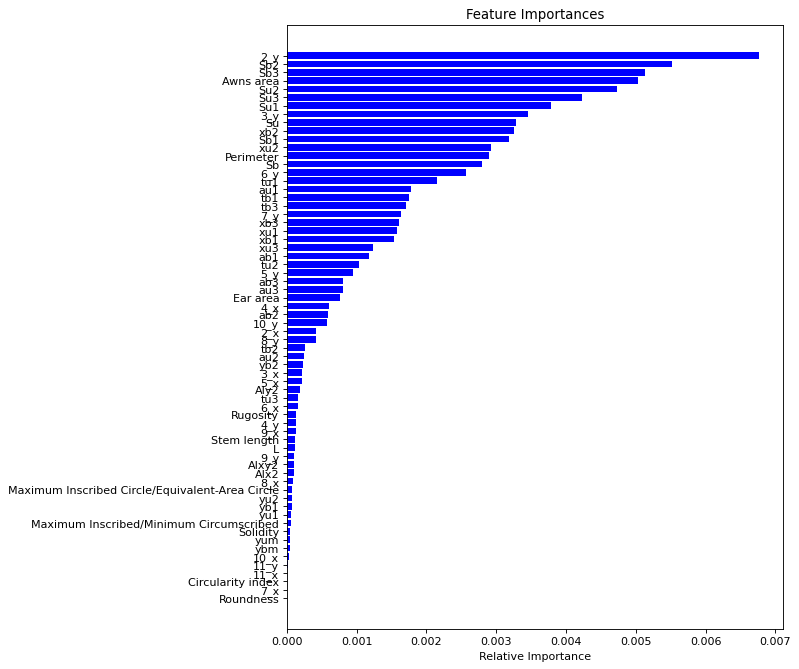

In [255]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

features = list(X_train1)
importances = abs(np.std(X_train1.to_numpy(), 0)*classifier.coef_[0])
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [257]:
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline  

# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

# features = list(X_train2)
# importances = abs(np.std(X_train2.to_numpy(), 0)*classifier.coef_[0])
# indices = np.argsort(importances)

# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

In [110]:
#RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score


In [111]:
fr = RandomForestClassifier(random_state=0)
fr.fit(X_train, Y_train['tel'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [175]:
print("TRAIN")
print('precision_score: ', precision_score(fr.predict(X_train),Y_train['tel']))
print('roc_auc_score: ',roc_auc_score(fr.predict(X_train),Y_train['tel']))

TRAIN
precision_score:  1.0
roc_auc_score:  1.0


In [113]:
print("TEST")
print('precision_score: {:.4f}'.format(precision_score(fr.predict(X_test),Y_test['tel'])))
print('roc_auc_score: {:.4f}'.format(roc_auc_score(fr.predict(X_test),Y_test['tel'])))

TEST
precision_score: 0.6448
roc_auc_score: 0.8311


In [114]:
print("HOLD OUT")
print('precision_score: {:.4f}'.format(precision_score(fr.predict(X_out),Y_out['tel'])))
print('roc_auc_score: {:.4f}'.format(roc_auc_score(fr.predict(X_out),Y_out['tel'])))

HOLD OUT
precision_score: 0.6981
roc_auc_score: 0.8206


In [263]:
for name, importance in zip(list(X_train), fr.feature_importances_):
    print(name, "=", importance)

Stem length = 0.02899276814624619
Perimeter = 0.01945816392495959
Ear area = 0.012899151609888868
Awns area = 0.084686906530745
Circularity index = 0.02417353425281777
Roundness = 0.026652341168978494
Solidity = 0.0164872139528925
Rugosity = 0.019455205722340455
Maximum Inscribed/Minimum Circumscribed = 0.008527892497545908
Maximum Inscribed Circle/Equivalent-Area Circle = 0.010480672208495813
xu1 = 0.011902533347766541
xu2 = 0.04195869658268953
xu3 = 0.010652338962037537
yu1 = 0.0156928355720797
yu2 = 0.012229340327927276
au1 = 0.010185095289524417
au2 = 0.010639254528722874
au3 = 0.011893442882187397
tu1 = 0.010003268929410657
tu2 = 0.008566296456734571
tu3 = 0.009882233144297687
Su1 = 0.01078635351634561
Su2 = 0.01770210601000482
Su3 = 0.007795641519843924
Su = 0.014907109265330466
yum = 0.025256732417369896
xb1 = 0.012518747643315434
xb2 = 0.029976918908926904
xb3 = 0.008303347820785775
yb1 = 0.015133312073742453
yb2 = 0.013143935257621765
ab1 = 0.01399356575522303
ab2 = 0.00911921

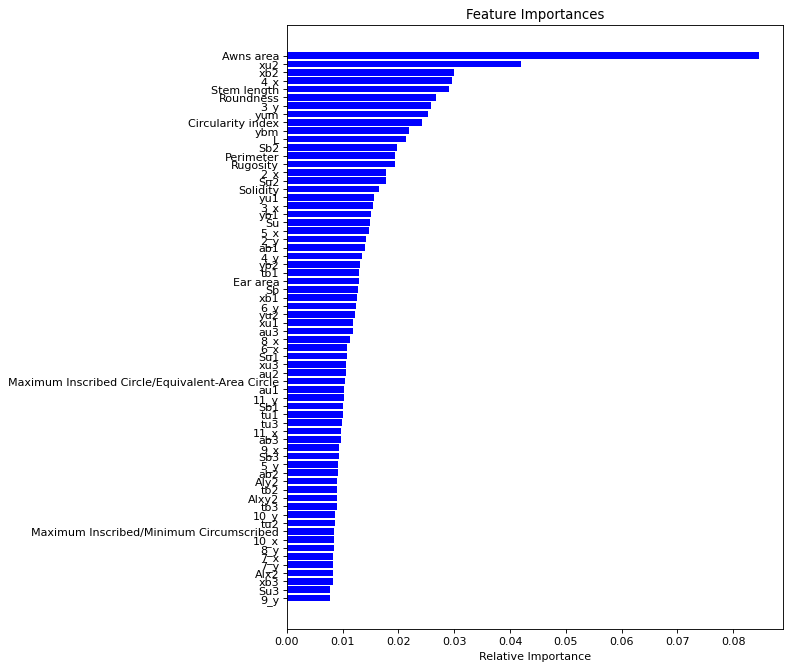

In [264]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

features = list(X_train)
importances = fr.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [267]:
# import lightgbm as ltb

# model = ltb.LGBMClassifier()
# model.fit(X_train, Y_train['tel'])
# # Get predictions
# print("TRAIN\n",roc_auc_score( model.predict(X_train),Y_train['tel']))
# print("TEST\n",roc_auc_score( model.predict(X_test),Y_test['tel']))
# print("HOLD OUT\n",roc_auc_score( model.predict(X_out),Y_out['tel']))



In [115]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

Y_train['tel'] = Y_train['tet'].astype(int)
Y_test['tel'] = Y_test['tet'].astype(int)
Y_out['tel'] = Y_out['tet'].astype(int)

# Create the model

model = CatBoostClassifier(depth = 6,l2_leaf_reg = 28.0)

model.fit(X_train, Y_train['tel'])

print("TRAIN\n",roc_auc_score( model.predict(X_train),Y_train['tel']))
print("TEST\n",roc_auc_score( model.predict(X_test),Y_test['tel']))
print("HOLD OUT\n",roc_auc_score( model.predict(X_out),Y_out['tel']))

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

0:	learn: 0.6805280	total: 91.2ms	remaining: 1m 31s
1:	learn: 0.6669457	total: 106ms	remaining: 52.9s
2:	learn: 0.6563611	total: 122ms	remaining: 40.5s
3:	learn: 0.6471749	total: 138ms	remaining: 34.2s
4:	learn: 0.6365128	total: 159ms	remaining: 31.5s
5:	learn: 0.6276378	total: 174ms	remaining: 28.9s
6:	learn: 0.6177510	total: 200ms	remaining: 28.4s
7:	learn: 0.6070109	total: 217ms	remaining: 27s
8:	learn: 0.5987386	total: 235ms	remaining: 25.9s
9:	learn: 0.5896960	total: 259ms	remaining: 25.6s
10:	learn: 0.5815877	total: 282ms	remaining: 25.4s
11:	learn: 0.5748815	total: 305ms	remaining: 25.1s
12:	learn: 0.5662297	total: 325ms	remaining: 24.7s
13:	learn: 0.5578156	total: 344ms	remaining: 24.2s
14:	learn: 0.5518334	total: 364ms	remaining: 23.9s
15:	learn: 0.5432230	total: 382ms	remaining: 23.5s
16:	learn: 0.5376390	total: 402ms	remaining: 23.3s
17:	learn: 0.5312455	total: 422ms	remaining: 23s
18:	learn: 0.5272370	total: 445ms	remaining: 23s
19:	learn: 0.5221620	total: 469ms	remaining: 

164:	learn: 0.3150060	total: 3.46s	remaining: 17.5s
165:	learn: 0.3143294	total: 3.48s	remaining: 17.5s
166:	learn: 0.3138772	total: 3.5s	remaining: 17.5s
167:	learn: 0.3132920	total: 3.52s	remaining: 17.4s
168:	learn: 0.3128149	total: 3.54s	remaining: 17.4s
169:	learn: 0.3120796	total: 3.56s	remaining: 17.4s
170:	learn: 0.3114835	total: 3.57s	remaining: 17.3s
171:	learn: 0.3109046	total: 3.59s	remaining: 17.3s
172:	learn: 0.3102438	total: 3.61s	remaining: 17.2s
173:	learn: 0.3098810	total: 3.63s	remaining: 17.2s
174:	learn: 0.3092302	total: 3.64s	remaining: 17.2s
175:	learn: 0.3088046	total: 3.66s	remaining: 17.1s
176:	learn: 0.3082976	total: 3.68s	remaining: 17.1s
177:	learn: 0.3075365	total: 3.7s	remaining: 17.1s
178:	learn: 0.3070968	total: 3.72s	remaining: 17.1s
179:	learn: 0.3064626	total: 3.75s	remaining: 17.1s
180:	learn: 0.3055148	total: 3.77s	remaining: 17.1s
181:	learn: 0.3051350	total: 3.8s	remaining: 17.1s
182:	learn: 0.3042860	total: 3.83s	remaining: 17.1s
183:	learn: 0.3

326:	learn: 0.2407144	total: 6.74s	remaining: 13.9s
327:	learn: 0.2403180	total: 6.75s	remaining: 13.8s
328:	learn: 0.2400835	total: 6.77s	remaining: 13.8s
329:	learn: 0.2398459	total: 6.8s	remaining: 13.8s
330:	learn: 0.2394381	total: 6.82s	remaining: 13.8s
331:	learn: 0.2389030	total: 6.84s	remaining: 13.8s
332:	learn: 0.2388212	total: 6.86s	remaining: 13.7s
333:	learn: 0.2385976	total: 6.88s	remaining: 13.7s
334:	learn: 0.2384851	total: 6.9s	remaining: 13.7s
335:	learn: 0.2383768	total: 6.92s	remaining: 13.7s
336:	learn: 0.2379298	total: 6.95s	remaining: 13.7s
337:	learn: 0.2372304	total: 6.97s	remaining: 13.7s
338:	learn: 0.2367433	total: 6.99s	remaining: 13.6s
339:	learn: 0.2362902	total: 7.02s	remaining: 13.6s
340:	learn: 0.2360241	total: 7.04s	remaining: 13.6s
341:	learn: 0.2357137	total: 7.06s	remaining: 13.6s
342:	learn: 0.2351955	total: 7.08s	remaining: 13.6s
343:	learn: 0.2344763	total: 7.11s	remaining: 13.5s
344:	learn: 0.2340864	total: 7.13s	remaining: 13.5s
345:	learn: 0.

489:	learn: 0.1856199	total: 10.1s	remaining: 10.5s
490:	learn: 0.1852982	total: 10.1s	remaining: 10.5s
491:	learn: 0.1852473	total: 10.1s	remaining: 10.4s
492:	learn: 0.1848754	total: 10.1s	remaining: 10.4s
493:	learn: 0.1848060	total: 10.2s	remaining: 10.4s
494:	learn: 0.1845003	total: 10.2s	remaining: 10.4s
495:	learn: 0.1844437	total: 10.2s	remaining: 10.4s
496:	learn: 0.1841905	total: 10.2s	remaining: 10.3s
497:	learn: 0.1837672	total: 10.2s	remaining: 10.3s
498:	learn: 0.1833096	total: 10.3s	remaining: 10.3s
499:	learn: 0.1829322	total: 10.3s	remaining: 10.3s
500:	learn: 0.1828462	total: 10.3s	remaining: 10.3s
501:	learn: 0.1824571	total: 10.3s	remaining: 10.2s
502:	learn: 0.1819709	total: 10.3s	remaining: 10.2s
503:	learn: 0.1817628	total: 10.4s	remaining: 10.2s
504:	learn: 0.1815971	total: 10.4s	remaining: 10.2s
505:	learn: 0.1811230	total: 10.4s	remaining: 10.2s
506:	learn: 0.1807794	total: 10.4s	remaining: 10.1s
507:	learn: 0.1803302	total: 10.4s	remaining: 10.1s
508:	learn: 

653:	learn: 0.1446787	total: 13.4s	remaining: 7.1s
654:	learn: 0.1444577	total: 13.4s	remaining: 7.08s
655:	learn: 0.1443622	total: 13.5s	remaining: 7.06s
656:	learn: 0.1441621	total: 13.5s	remaining: 7.04s
657:	learn: 0.1439266	total: 13.5s	remaining: 7.02s
658:	learn: 0.1435665	total: 13.5s	remaining: 7s
659:	learn: 0.1434030	total: 13.5s	remaining: 6.98s
660:	learn: 0.1432737	total: 13.6s	remaining: 6.96s
661:	learn: 0.1431422	total: 13.6s	remaining: 6.94s
662:	learn: 0.1429201	total: 13.6s	remaining: 6.92s
663:	learn: 0.1426602	total: 13.6s	remaining: 6.9s
664:	learn: 0.1423185	total: 13.7s	remaining: 6.88s
665:	learn: 0.1420144	total: 13.7s	remaining: 6.86s
666:	learn: 0.1418240	total: 13.7s	remaining: 6.84s
667:	learn: 0.1417498	total: 13.7s	remaining: 6.81s
668:	learn: 0.1417210	total: 13.7s	remaining: 6.79s
669:	learn: 0.1414626	total: 13.7s	remaining: 6.77s
670:	learn: 0.1414149	total: 13.8s	remaining: 6.75s
671:	learn: 0.1411897	total: 13.8s	remaining: 6.73s
672:	learn: 0.140

815:	learn: 0.1165274	total: 16.7s	remaining: 3.77s
816:	learn: 0.1163943	total: 16.7s	remaining: 3.74s
817:	learn: 0.1163428	total: 16.7s	remaining: 3.72s
818:	learn: 0.1162063	total: 16.8s	remaining: 3.7s
819:	learn: 0.1160743	total: 16.8s	remaining: 3.68s
820:	learn: 0.1160140	total: 16.8s	remaining: 3.66s
821:	learn: 0.1159866	total: 16.8s	remaining: 3.64s
822:	learn: 0.1158523	total: 16.8s	remaining: 3.62s
823:	learn: 0.1157225	total: 16.8s	remaining: 3.6s
824:	learn: 0.1155748	total: 16.9s	remaining: 3.58s
825:	learn: 0.1154126	total: 16.9s	remaining: 3.55s
826:	learn: 0.1152136	total: 16.9s	remaining: 3.53s
827:	learn: 0.1150689	total: 16.9s	remaining: 3.51s
828:	learn: 0.1149588	total: 16.9s	remaining: 3.49s
829:	learn: 0.1148194	total: 17s	remaining: 3.47s
830:	learn: 0.1146999	total: 17s	remaining: 3.45s
831:	learn: 0.1145750	total: 17s	remaining: 3.43s
832:	learn: 0.1144192	total: 17s	remaining: 3.41s
833:	learn: 0.1143921	total: 17s	remaining: 3.39s
834:	learn: 0.1142371	to

982:	learn: 0.0963390	total: 20s	remaining: 346ms
983:	learn: 0.0961974	total: 20s	remaining: 326ms
984:	learn: 0.0960838	total: 20.1s	remaining: 305ms
985:	learn: 0.0959504	total: 20.1s	remaining: 285ms
986:	learn: 0.0959328	total: 20.1s	remaining: 265ms
987:	learn: 0.0958338	total: 20.1s	remaining: 244ms
988:	learn: 0.0958170	total: 20.1s	remaining: 224ms
989:	learn: 0.0957884	total: 20.1s	remaining: 203ms
990:	learn: 0.0956605	total: 20.2s	remaining: 183ms
991:	learn: 0.0956569	total: 20.2s	remaining: 163ms
992:	learn: 0.0954827	total: 20.2s	remaining: 142ms
993:	learn: 0.0953997	total: 20.2s	remaining: 122ms
994:	learn: 0.0952245	total: 20.2s	remaining: 102ms
995:	learn: 0.0951703	total: 20.2s	remaining: 81.3ms
996:	learn: 0.0949973	total: 20.3s	remaining: 61ms
997:	learn: 0.0948184	total: 20.3s	remaining: 40.6ms
998:	learn: 0.0946959	total: 20.3s	remaining: 20.3ms
999:	learn: 0.0945551	total: 20.3s	remaining: 0us
TRAIN
 0.9970652741606498
TEST
 0.8289023521026372
HOLD OUT
 0.84555

In [116]:
# normal
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

Y_train['tel'] = Y_train['tet'].astype(int)
Y_test['tel'] = Y_test['tet'].astype(int)
Y_out['tel'] = Y_out['tet'].astype(int)

# Create the model

model = CatBoostClassifier(depth = 6,l2_leaf_reg = 28.0)

model.fit(X_train1, Y_train['tel'])

print("TRAIN\n",roc_auc_score( model.predict(X_train1),Y_train['tel']))
print("TEST\n",roc_auc_score( model.predict(X_test1),Y_test['tel']))
print("HOLD OUT\n",roc_auc_score( model.predict(X_out1),Y_out['tel']))

0:	learn: 0.6805280	total: 14.5ms	remaining: 14.5s
1:	learn: 0.6669457	total: 30.4ms	remaining: 15.2s
2:	learn: 0.6563611	total: 51.5ms	remaining: 17.1s
3:	learn: 0.6471749	total: 69.5ms	remaining: 17.3s


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

4:	learn: 0.6365128	total: 92.6ms	remaining: 18.4s
5:	learn: 0.6276378	total: 118ms	remaining: 19.6s
6:	learn: 0.6177510	total: 142ms	remaining: 20.2s
7:	learn: 0.6070109	total: 163ms	remaining: 20.2s
8:	learn: 0.5987386	total: 181ms	remaining: 19.9s
9:	learn: 0.5896960	total: 198ms	remaining: 19.6s
10:	learn: 0.5815877	total: 221ms	remaining: 19.8s
11:	learn: 0.5748815	total: 239ms	remaining: 19.7s
12:	learn: 0.5662297	total: 262ms	remaining: 19.9s
13:	learn: 0.5578156	total: 286ms	remaining: 20.1s
14:	learn: 0.5518334	total: 310ms	remaining: 20.4s
15:	learn: 0.5432230	total: 333ms	remaining: 20.5s
16:	learn: 0.5376390	total: 364ms	remaining: 21s
17:	learn: 0.5312455	total: 391ms	remaining: 21.3s
18:	learn: 0.5272370	total: 420ms	remaining: 21.7s
19:	learn: 0.5221620	total: 442ms	remaining: 21.7s
20:	learn: 0.5173376	total: 470ms	remaining: 21.9s
21:	learn: 0.5126412	total: 495ms	remaining: 22s
22:	learn: 0.5082379	total: 524ms	remaining: 22.3s
23:	learn: 0.5029500	total: 550ms	remain

165:	learn: 0.3127137	total: 3.63s	remaining: 18.3s
166:	learn: 0.3120951	total: 3.65s	remaining: 18.2s
167:	learn: 0.3114635	total: 3.67s	remaining: 18.2s
168:	learn: 0.3109178	total: 3.7s	remaining: 18.2s
169:	learn: 0.3101039	total: 3.71s	remaining: 18.1s
170:	learn: 0.3095157	total: 3.73s	remaining: 18.1s
171:	learn: 0.3089472	total: 3.75s	remaining: 18s
172:	learn: 0.3083054	total: 3.77s	remaining: 18s
173:	learn: 0.3081498	total: 3.79s	remaining: 18s
174:	learn: 0.3076279	total: 3.82s	remaining: 18s
175:	learn: 0.3068558	total: 3.84s	remaining: 18s
176:	learn: 0.3063811	total: 3.86s	remaining: 18s
177:	learn: 0.3056355	total: 3.89s	remaining: 18s
178:	learn: 0.3049821	total: 3.91s	remaining: 17.9s
179:	learn: 0.3044923	total: 3.93s	remaining: 17.9s
180:	learn: 0.3040992	total: 3.95s	remaining: 17.9s
181:	learn: 0.3037678	total: 3.96s	remaining: 17.8s
182:	learn: 0.3029344	total: 3.98s	remaining: 17.8s
183:	learn: 0.3026055	total: 4s	remaining: 17.7s
184:	learn: 0.3020933	total: 4

327:	learn: 0.2392611	total: 7.16s	remaining: 14.7s
328:	learn: 0.2388106	total: 7.18s	remaining: 14.6s
329:	learn: 0.2385491	total: 7.2s	remaining: 14.6s
330:	learn: 0.2384568	total: 7.22s	remaining: 14.6s
331:	learn: 0.2379388	total: 7.24s	remaining: 14.6s
332:	learn: 0.2378585	total: 7.27s	remaining: 14.6s
333:	learn: 0.2376349	total: 7.28s	remaining: 14.5s
334:	learn: 0.2375563	total: 7.3s	remaining: 14.5s
335:	learn: 0.2374400	total: 7.33s	remaining: 14.5s
336:	learn: 0.2368955	total: 7.34s	remaining: 14.4s
337:	learn: 0.2367853	total: 7.36s	remaining: 14.4s
338:	learn: 0.2362483	total: 7.38s	remaining: 14.4s
339:	learn: 0.2358420	total: 7.4s	remaining: 14.4s
340:	learn: 0.2354836	total: 7.42s	remaining: 14.3s
341:	learn: 0.2350488	total: 7.45s	remaining: 14.3s
342:	learn: 0.2343441	total: 7.47s	remaining: 14.3s
343:	learn: 0.2337211	total: 7.49s	remaining: 14.3s
344:	learn: 0.2331752	total: 7.52s	remaining: 14.3s
345:	learn: 0.2326040	total: 7.54s	remaining: 14.3s
346:	learn: 0.2

486:	learn: 0.1827068	total: 10.5s	remaining: 11.1s
487:	learn: 0.1824143	total: 10.6s	remaining: 11.1s
488:	learn: 0.1819894	total: 10.6s	remaining: 11.1s
489:	learn: 0.1816485	total: 10.6s	remaining: 11s
490:	learn: 0.1813668	total: 10.6s	remaining: 11s
491:	learn: 0.1811377	total: 10.7s	remaining: 11s
492:	learn: 0.1808313	total: 10.7s	remaining: 11s
493:	learn: 0.1806330	total: 10.7s	remaining: 11s
494:	learn: 0.1801512	total: 10.7s	remaining: 10.9s
495:	learn: 0.1798393	total: 10.7s	remaining: 10.9s
496:	learn: 0.1795982	total: 10.7s	remaining: 10.9s
497:	learn: 0.1794044	total: 10.8s	remaining: 10.9s
498:	learn: 0.1790440	total: 10.8s	remaining: 10.8s
499:	learn: 0.1787051	total: 10.8s	remaining: 10.8s
500:	learn: 0.1786164	total: 10.8s	remaining: 10.8s
501:	learn: 0.1782477	total: 10.8s	remaining: 10.8s
502:	learn: 0.1779282	total: 10.9s	remaining: 10.7s
503:	learn: 0.1777238	total: 10.9s	remaining: 10.7s
504:	learn: 0.1775190	total: 10.9s	remaining: 10.7s
505:	learn: 0.1771024	

648:	learn: 0.1448030	total: 13.8s	remaining: 7.45s
649:	learn: 0.1446122	total: 13.8s	remaining: 7.43s
650:	learn: 0.1444102	total: 13.8s	remaining: 7.41s
651:	learn: 0.1442136	total: 13.8s	remaining: 7.38s
652:	learn: 0.1439202	total: 13.8s	remaining: 7.36s
653:	learn: 0.1435808	total: 13.9s	remaining: 7.34s
654:	learn: 0.1435329	total: 13.9s	remaining: 7.31s
655:	learn: 0.1434179	total: 13.9s	remaining: 7.29s
656:	learn: 0.1431967	total: 13.9s	remaining: 7.27s
657:	learn: 0.1430284	total: 13.9s	remaining: 7.25s
658:	learn: 0.1429172	total: 14s	remaining: 7.22s
659:	learn: 0.1426550	total: 14s	remaining: 7.2s
660:	learn: 0.1426066	total: 14s	remaining: 7.18s
661:	learn: 0.1423093	total: 14s	remaining: 7.16s
662:	learn: 0.1422684	total: 14s	remaining: 7.14s
663:	learn: 0.1420431	total: 14.1s	remaining: 7.12s
664:	learn: 0.1418095	total: 14.1s	remaining: 7.1s
665:	learn: 0.1415683	total: 14.1s	remaining: 7.08s
666:	learn: 0.1413804	total: 14.1s	remaining: 7.05s
667:	learn: 0.1411935	to

816:	learn: 0.1161121	total: 17.1s	remaining: 3.83s
817:	learn: 0.1159807	total: 17.1s	remaining: 3.81s
818:	learn: 0.1158775	total: 17.1s	remaining: 3.79s
819:	learn: 0.1157547	total: 17.2s	remaining: 3.77s
820:	learn: 0.1155305	total: 17.2s	remaining: 3.75s
821:	learn: 0.1153824	total: 17.2s	remaining: 3.73s
822:	learn: 0.1153642	total: 17.2s	remaining: 3.71s
823:	learn: 0.1151927	total: 17.3s	remaining: 3.69s
824:	learn: 0.1150784	total: 17.3s	remaining: 3.67s
825:	learn: 0.1149706	total: 17.3s	remaining: 3.65s
826:	learn: 0.1149394	total: 17.3s	remaining: 3.62s
827:	learn: 0.1147362	total: 17.3s	remaining: 3.6s
828:	learn: 0.1146532	total: 17.4s	remaining: 3.58s
829:	learn: 0.1145110	total: 17.4s	remaining: 3.56s
830:	learn: 0.1143064	total: 17.4s	remaining: 3.54s
831:	learn: 0.1142005	total: 17.4s	remaining: 3.51s
832:	learn: 0.1140776	total: 17.4s	remaining: 3.49s
833:	learn: 0.1139267	total: 17.4s	remaining: 3.47s
834:	learn: 0.1137521	total: 17.5s	remaining: 3.45s
835:	learn: 0

979:	learn: 0.0969959	total: 20s	remaining: 408ms
980:	learn: 0.0968909	total: 20s	remaining: 387ms
981:	learn: 0.0967485	total: 20s	remaining: 367ms
982:	learn: 0.0966529	total: 20s	remaining: 347ms
983:	learn: 0.0964835	total: 20.1s	remaining: 326ms
984:	learn: 0.0963011	total: 20.1s	remaining: 306ms
985:	learn: 0.0962061	total: 20.1s	remaining: 285ms
986:	learn: 0.0961420	total: 20.1s	remaining: 265ms
987:	learn: 0.0959527	total: 20.1s	remaining: 245ms
988:	learn: 0.0958087	total: 20.2s	remaining: 224ms
989:	learn: 0.0957936	total: 20.2s	remaining: 204ms
990:	learn: 0.0956164	total: 20.2s	remaining: 183ms
991:	learn: 0.0954594	total: 20.2s	remaining: 163ms
992:	learn: 0.0953244	total: 20.2s	remaining: 143ms
993:	learn: 0.0951840	total: 20.2s	remaining: 122ms
994:	learn: 0.0951433	total: 20.3s	remaining: 102ms
995:	learn: 0.0950433	total: 20.3s	remaining: 81.4ms
996:	learn: 0.0949037	total: 20.3s	remaining: 61ms
997:	learn: 0.0947665	total: 20.3s	remaining: 40.7ms
998:	learn: 0.09467

In [ ]:
for name, importance in zip(list(X_train),  model.feature_importances_):
    print(name, "=", importance)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

features = list(X_train1)
importances =  model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
X_set=X_test
print((X_set.head()))
X_set['Stem length'][:].min()

In [ ]:
# dif = pd.DataFrame()
data = All_commonResults_n
m = len(data)
#print(data)
r = data['vegetation'].unique()
n = len(r)
print(n)
# dif = pd.DataFrame(np.zeros((n, 2)))
# dif.columns=['veg','number']

r1 = np.array([])
r2 = np.array([])
print(r1)

data = All_commonResults_n
df = data[['vegetation','passive number']]
print(df)
print(df.groupby('passive number'))
print(df.groupby('vegetation').groups)

grp = df.groupby('vegetation')

for name, group in grp:

    print(name)
    h = group['passive number'].value_counts()
    #print(group['passive number'].value_counts())
    print(len(h))
    r1 = np.append(r1, name)
    r2 = np.append(r2, len(h))

    
print(r1)
print(r2)

In [ ]:
data = All_commonResults_n
df = data[['vegetation','passive number']]
#print(df)
#print(df.groupby('passive number'))
#print(df.groupby('vegetation').groups)
d = pd.DataFrame()
d = data[['vegetation','passive number']]
grp = df.groupby('vegetation')

for name, group in grp:

    print(name)
    
    h = group['passive number'].value_counts()
    #print(group['passive number'].value_counts())
    print(len(h))

   # print(group.unique())

In [ ]:
grp.head()

In [ ]:
sns.countplot(grp['vegetation'])